In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


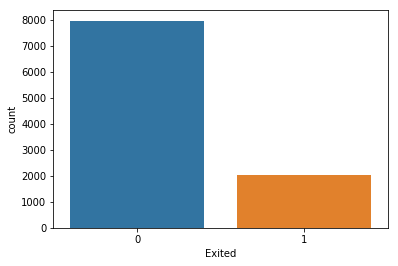

In [37]:
import seaborn as sns
sns.countplot(df.iloc[:, -1])


In [8]:
df.shape

(10000, 14)

In [13]:
X = df.iloc[:, 3:-1]

In [14]:
y = df.iloc[:, -1]

In [20]:
X = pd.get_dummies(X, ['Geography', 'Gender'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                   test_size=0.25)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()

In [25]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)

GaussianNB()

In [29]:
lr_predition = lr.predict(X_test)
dt_prediction = dt.predict(X_test)
svc_prediction = svc.predict(X_test)
knn_prediction = knn.predict(X_test)
nb_prediction = nb.predict(X_test)

In [30]:
print('Logistic Regression')
print(confusion_matrix(y_test, lr_predition))
print(accuracy_score(y_test, lr_predition))
print()
print('Decision Trees')
print(confusion_matrix(y_test, dt_prediction))
print(accuracy_score(y_test, dt_prediction))
print()
print('SVC')
print(confusion_matrix(y_test, svc_prediction))
print(accuracy_score(y_test, svc_prediction))
print()
print('KNN')
print(confusion_matrix(y_test, knn_prediction))
print(accuracy_score(y_test, knn_prediction))
print()
print('Naive Bayes')
print(confusion_matrix(y_test, nb_prediction))
print(accuracy_score(y_test, nb_prediction))
print()

Logistic Regression
[[1958   45]
 [ 455   42]]
0.8

Decision Trees
[[1732  271]
 [ 247  250]]
0.7928

SVC
[[2003    0]
 [ 497    0]]
0.8012

KNN
[[1873  130]
 [ 450   47]]
0.768

Naive Bayes
[[1934   69]
 [ 458   39]]
0.7892



In [40]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [47]:
from sklearn.model_selection import cross_val_score
score_lr = cross_val_score(lr, X, y, cv=cv, scoring='accuracy')
print('Logistic Regression')
print(score_lr.mean())
print()
score_dt = cross_val_score(dt, X, y, cv=cv, scoring='accuracy')
print('Decision Trees')
print(score_dt.mean())
print()
score_svc = cross_val_score(svc, X, y, cv=cv, scoring='accuracy')
print('SVC')
print(score_svc.mean())
print()
score_knn = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
print('KNN')
print(score_knn.mean())
print()
score_nb = cross_val_score(nb, X, y, cv=cv, scoring='accuracy')
print('Naive Bayes')
print(score_nb.mean())
print()

Logistic Regression
0.7899

Decision Trees
0.7902

SVC
0.7963

KNN
0.7631000000000001

Naive Bayes
0.7851000000000001



In [53]:
all_models = []

lr1 = LogisticRegression(penalty='l2', random_state=42)
lr2 = LogisticRegression(penalty='l2', random_state=0)

dt1 = DecisionTreeClassifier(max_depth=3)
dt2 = DecisionTreeClassifier(max_depth=5)

svc1 = SVC(kernel='linear')
svc2 = SVC(kernel='rbf')

knn1 = KNeighborsClassifier(n_neighbors=8)
knn2 = KNeighborsClassifier(n_neighbors=4)

nb1 = GaussianNB()
nb2 = GaussianNB()

all_models.append(('lr1', lr1))
all_models.append(('lr2', lr2))
all_models.append(('dt1', dt1))
all_models.append(('dt2', dt2))
all_models.append(('svc1', svc1))
all_models.append(('svc2', svc2))
all_models.append(('knn1', knn1))
all_models.append(('knn2', knn2))
all_models.append(('nb1', nb1))
all_models.append(('nb2', nb2))

In [54]:
ensemble_model = VotingClassifier(all_models)

ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

In [55]:
print('Ensemble Model')
print(confusion_matrix(y_test, ensemble_pred))
print(accuracy_score(y_test, ensemble_pred))
print()

Ensemble Model
[[1998    5]
 [ 480   17]]
0.806



In [ ]:
score_ensemble = cross_val_score(ensemble_model, X, y, cv=cv, scoring='accuracy')
print('Ensemble Model')
print(score_ensemble.mean())
print()